<table>

<thead>

<tr>

<th>Abbreviation</th>

<th>1 letter abbreviation</th>

<th>Amino acid name</th>

</tr>

</thead>

<tbody>

<tr>

<td>Ala</td>

<td>A</td>

<td>Alanine</td>

</tr>

<tr>

<td>Arg</td>

<td>R</td>

<td>Arginine</td>

</tr>

<tr>

<td>Asn</td>

<td>N</td>

<td>Asparagine</td>

</tr>

<tr>

<td>Asp</td>

<td>D</td>

<td>Aspartic acid</td>

</tr>

<tr>

<td>Cys</td>

<td>C</td>

<td>Cysteine</td>

</tr>

<tr>

<td>Gln</td>

<td>Q</td>

<td>Glutamine</td>

</tr>

<tr>

<td>Glu</td>

<td>E</td>

<td>Glutamic acid</td>

</tr>

<tr>

<td>Gly</td>

<td>G</td>

<td>Glycine</td>

</tr>

<tr>

<td>His</td>

<td>H</td>

<td>Histidine</td>

</tr>

<tr>

<td>Ile</td>

<td>I</td>

<td>Isoleucine</td>

</tr>

<tr>

<td>Leu</td>

<td>L</td>

<td>Leucine</td>

</tr>

<tr>

<td>Lys</td>

<td>K</td>

<td>Lysine</td>

</tr>

<tr>

<td>Met</td>

<td>M</td>

<td>Methionine</td>

</tr>

<tr>

<td>Phe</td>

<td>F</td>

<td>Phenylalanine</td>

</tr>

<tr>

<td>Pro</td>

<td>P</td>

<td>Proline</td>

</tr>

<tr>

<td>Pyl</td>

<td>O</td>

<td>Pyrrolysine</td>

</tr>

<tr>

<td>Ser</td>

<td>S</td>

<td>Serine</td>

</tr>

<tr>

<td>Sec</td>

<td>U</td>

<td>Selenocysteine</td>

</tr>

<tr>

<td>Thr</td>

<td>T</td>

<td>Threonine</td>

</tr>

<tr>

<td>Trp</td>

<td>W</td>

<td>Tryptophan</td>

</tr>

<tr>

<td>Tyr</td>

<td>Y</td>

<td>Tyrosine</td>

</tr>

<tr>

<td>Val</td>

<td>V</td>

<td>Valine</td>

</tr>

<tr>

<td>Asx</td>

<td>B</td>

<td>Aspartic acid or Asparagine</td>

</tr>

<tr>

<td>Glx</td>

<td>Z</td>

<td>Glutamic acid or Glutamine</td>

</tr>

<tr>

<td>Xaa</td>

<td>X</td>

<td>Any amino acid</td>

</tr>

<tr>

<td>Xle</td>

<td>J</td>

<td>Leucine or Isoleucine</td>

</tr>

<tr>

<td>TERM</td>

<td></td>

<td>termination codon</td>

</tr>

</tbody>

</table>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

In [2]:
proteins = []
prot = ''
seq = ''

# reading data
fhand = open('IRGSP-1.0_protein_2021-05-10.fasta')
for line in fhand.readlines():
    if line.startswith('>'):
        proteins.append(prot)
        seq += prot
        prot = ''
        continue
    prot += line.strip()

# finding the frequency of all amino acids
freq = dict()
for aa in seq:
    if aa in freq:
        freq[aa] += 1
    else: 
        freq[aa] = 1

print(sorted(freq.items(), key=lambda x: x[1], reverse=True))


In [ ]:
# Linear Regression

def LinearReggression(query,n, showGraph):
    Xarr = []
    Yarr = []

    for i in range(n):
        Xarr.append(len(proteins[i]))
        Yarr.append(proteins[i].count(query))

    Sumxi = sum(Xarr)
    Sumyi = sum(Yarr)
    Sumxisq = sum(i*i for i in Xarr)
    Sumxiyi = 0
    for i in range(n):
        Sumxiyi += Xarr[i]*Yarr[i]

    a1 = (n*Sumxiyi - Sumxi*Sumyi) / (n* Sumxisq - Sumxi*Sumxi) 
    a0 = (Sumyi / n) - (Sumxi /n)*a1

    if showGraph:
        #plotting data on matplotlib
        fig, ax = plt.subplots()
        ax.set_title("The first "+str(n)+"th protein's length vs frequency of "+str(query))
        ax.set_xlabel("Len of Protine Seq")
        ax.set_ylabel("Freq of "+str(query))

        #prediction line
        x = np.linspace(0, 6000, 3)
        y = a0 + a1*x
        ax.plot(x, y, 'b', label='predicted line')

        for i in range(n):
            ax.scatter(Xarr[i], Yarr[i], color = 'r',marker = '.')
        
        #ax.scatter(len(proteins[1922]), 222, color = 'r',marker = 'x')    
    
    return a0,a1



7.636320635929838 0.07074419670774298


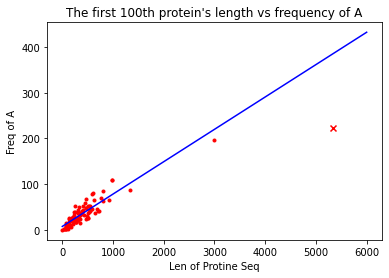

In [ ]:
a0,a1 = LinearReggression('A', 100, True)
print(a0,a1)

In [ ]:
query = 'A'
a0, a1 = LinearReggression(query, 100, False)

max_diff = 0

for i in range(len(proteins)):
    x = len(proteins[i])
    actual = proteins[i].count(query)
    predicted = round(a0 + a1*x)

    #print(i,"th protein, actual count", actual, "predicted count =", predicted)
    

    if abs(actual - predicted) > max_diff:
        max_diff = abs(actual - predicted)
        outlier = i

print(outlier)

0 th protein, actual count 0 predicted count = 8
1 th protein, actual count 41 predicted count = 57
2 th protein, actual count 20 predicted count = 18
3 th protein, actual count 26 predicted count = 27
4 th protein, actual count 45 predicted count = 50
5 th protein, actual count 3 predicted count = 13
6 th protein, actual count 39 predicted count = 45
7 th protein, actual count 37 predicted count = 33
8 th protein, actual count 11 predicted count = 17
9 th protein, actual count 25 predicted count = 22
10 th protein, actual count 23 predicted count = 33
11 th protein, actual count 53 predicted count = 46
12 th protein, actual count 84 predicted count = 65
13 th protein, actual count 40 predicted count = 30
14 th protein, actual count 40 predicted count = 29
15 th protein, actual count 44 predicted count = 36
16 th protein, actual count 109 predicted count = 77
17 th protein, actual count 109 predicted count = 77
18 th protein, actual count 15 predicted count = 33
19 th protein, actual c

In [ ]:
noOfProt = len(proteins)
robustness = dict()

for query in freq.keys():
    print('Working on',query)
    a0, a1 = LinearReggression(query, 100, False)
    absoluteSumOfResiduals = 0

    for i in range(noOfProt):
        x = len(proteins[i])
        actual = proteins[i].count(query)
        predicted = round(a0 + a1*x)

        absoluteSumOfResiduals += abs(actual - predicted)

    robustness[query] = absoluteSumOfResiduals / seq.count(query)

print(sorted(robustness.items(), key=lambda x: x[1]))

Working on M
Working on S
Working on A
Working on G
Working on Q
Working on D
Working on N
Working on T
Working on Y
Working on I
Working on K
Working on W
Working on C
Working on R
Working on L
Working on V
Working on P
Working on E
Working on H
Working on F
Working on *
Working on X
[('*', 0.04705097806757558), ('V', 0.23711855411435995), ('L', 0.23999337364118417), ('T', 0.26225401857009933), ('D', 0.27160198401778224), ('S', 0.28730688513202357), ('A', 0.303300997923863), ('E', 0.30365133668225647), ('G', 0.30701026700225353), ('R', 0.30929275263404854), ('F', 0.3312770186188878), ('M', 0.33561303083885274), ('I', 0.34295793955690035), ('P', 0.36223140495867767), ('N', 0.3630039673472779), ('Q', 0.3740796185173816), ('Y', 0.4053518446580078), ('K', 0.4063735524424258), ('H', 0.42931521355453583), ('C', 0.485638182457558), ('W', 0.5005366017424422), ('X', 1.0)]
